In [1]:
# Script to plot the flight path of the phugoid using Lanchester's model.
# It uses the sign convention and formulae provided by Milne-Thomson (1958).

import numpy
from matplotlib import pyplot

numpy.seterr(all='ignore')
'''
see http://docs.scipy.org/doc/numpy/reference/generated/numpy.seterr.html for explanation.  ignore over/underflow errors that pop up in the radius_of_curvature function
'''

def radius_of_curvature(z, zt, C):
    """Returns the radius of curvature of the flight path at any point.
    
    Parameters
    ---------
    z : float
        current depth below the reference horizontal line.
    zt : float
        initial depth below the reference horizontal line.
    C : float
        constant of integration.

    Returns
    -------
    radius : float
        radius of curvature.
    """
    return zt / (1/3 - C/2*(zt/z)**1.5)

def rotate(x, z, xCenter, zCenter, angle):
    """Returns the new position of the point.

    Parameters
    ---------
    x : float
        previous x-position of the point
    z : float
        previous z-position of the point.
    xCenter : float
        x-location of the center of rotation.
    zCenter : float
        z-location of the center of rotation.
    angle : float
        angle of rotation

    Returns
    -------
    xCenter_new : float
        new x-location of the center of rotation.
    zCenter_new : float
        new z-location of the center of rotation.
    """
    dx = x - xCenter
    dz = z - zCenter
    # the following formulae take into account the orientation of the axes
    xNew = dx*numpy.cos(angle) + dz*numpy.sin(angle)
    zNew = -dx*numpy.sin(angle) + dz*numpy.cos(angle)
    return xCenter + xNew, zCenter + zNew

def plot_flight_path(zt, z0, theta0):
    """Plots the flight path.

    Parameters
    ---------
    zt : float
        trim height of the glider.
    z0 : float
        initial height of the glider.
    theta0 : float
        initial orientation of the glider.

    Returns
    -------
    None : None
    """
    # arrays to store the coordinates of the flight path
    N = 1000
    z = numpy.zeros(N)
    x = numpy.zeros(N)

    # set initial conditions
    z[0] = z0
    x[0] = 0.
    theta = theta0

    # calculate the constant C
    C = (numpy.cos(theta) - 1/3*z[0]/zt)*(z[0]/zt)**.5
    # incremental distance along the flight path
    ds = 1 
        
    #obtain the curve coordinates
    for i in range(1,N):
        # minus sign for the second coordinate because the z-axis points downwards
        normal = numpy.array([numpy.cos(theta+numpy.pi/2.), -numpy.sin(theta+numpy.pi/2.)])
        R = radius_of_curvature(z[i-1], zt, C)
        center = numpy.array([x[i-1]+normal[0]*R, z[i-1]+normal[1]*R])
        dtheta = ds/R
        x[i], z[i] = rotate(x[i-1], z[i-1], center[0], center[1], dtheta)
        theta = theta + dtheta

    # generate a plot
    pyplot.figure(figsize=(10,6))
    pyplot.plot(x, -z, color = 'k', ls='-', lw=2.0, label="$z_t=\ %.1f,\\,z_0=\ %.1f,\\,\\theta_0=\ %.2f$" % (zt, z[0], theta0))
    pyplot.axis('equal')
    pyplot.title("Flight path for $C$ = %.3f" % C, fontsize=18)
    pyplot.xlabel("$x$", fontsize=18)
    pyplot.ylabel("$z$", fontsize=18)
    pyplot.legend()
    pyplot.show()

# End of File

In [20]:
%run phugoid.py
%matplotlib inline

SyntaxError: invalid syntax (phugoid.py, line 126)

In [3]:
%run phugoid.py
%matplotlib inline

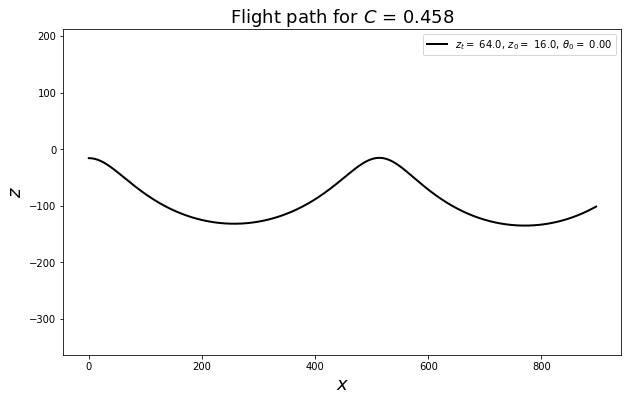

In [4]:
 #zt = 64, z = 16, theta=0
plot_flight_path(64, 16, 0)

In [19]:
#zt = 32,z=8, theta=0
plot_flight_path(32,8,0)

NameError: name 'plot_flight_path' is not defined

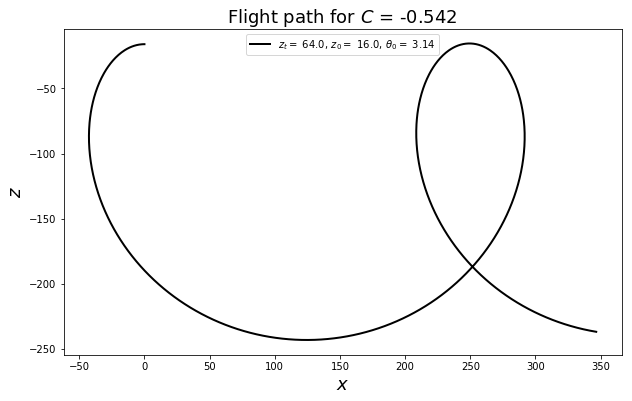

In [5]:
plot_flight_path(64,16,numpy.pi)

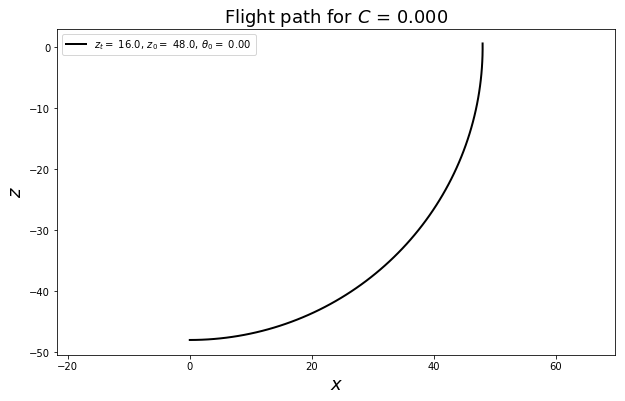

In [6]:
plot_flight_path(16,48,0.)

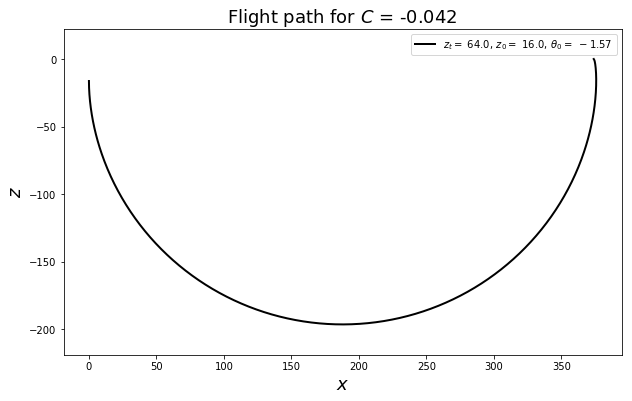

In [8]:
plot_flight_path(64,16,-numpy.pi/2)

In [9]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [10]:
T=100.0
dt=0.02
N=int(T/dt)+1
t=numpy.linspace(0.0,T,N)

In [11]:
z0=100.
b0=10.
zt=100.
g=9.81

u=numpy.array([z0,b0])

z=numpy.zeros(N)
z[0]=z0

In [13]:
for n in range(1,N):
    u=u+dt*numpy.array([u[1],g*(1-u[0]/zt)])
    z[n]=u[0]

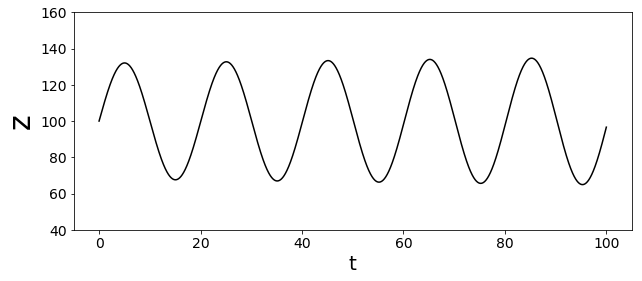

In [15]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both',labelsize=14)
pyplot.xlabel('t',fontsize=20)
pyplot.ylabel('z',fontsize=30)
pyplot.plot(t,z,'k-');

In [17]:
z_exact=b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+(z0-zt)*numpy.cos((g/zt)**.5*t)+zt

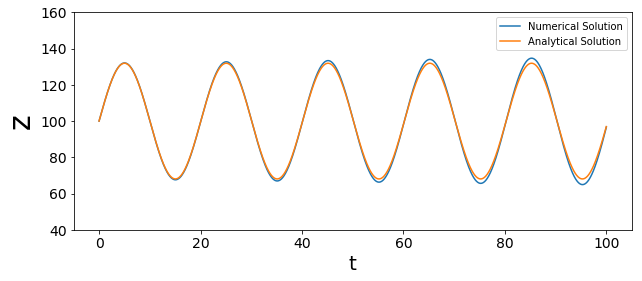

In [18]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both',labelsize=14)
pyplot.xlabel('t',fontsize=20)
pyplot.ylabel('z',fontsize=30)
pyplot.plot(t,z,)
pyplot.plot(t,z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

In [8]:
import numpy

In [10]:
T=100.0
dt=0.02
N=int(T/dt)+1
t=numpy.linspace(0.0,T,N)

In [12]:
z0=100.
b0=10.
zt=100.
g=9.81

u=numpy.array([z0,b0])

z=numpy.zeros(N)
z[0]=z0

In [18]:
#previous work was done in class, the following are finished in hoe

dt_values=[0.1,0.05,0.01,0.005,0.001,0.0001]
#make the list to put in the solutions
z_values = []
for dt in dt_values:
    t=numpy.linspace(0.0,T,num=N)
    N=int(T / dt)+1
    u=numpy.array([z0,b0])
    z=numpy.empty_like(t)
    z[0]=z0
    for n in range(1,998):
        rhs=numpy.array([u[1],g*(1-u[0]/zt)])
        u=u+dt*rhs
        z[n]=u[0]
        z_values.append(z)

In [21]:
#calculate error
def l1_error(z,z_exact,dt):
    error=dt*numpy.sum(numpy.abs(z-z_exact))
    return error

In [27]:
#heres the example of arrary subtraction
line1 = numpy.array([1,2,3,4,5])
line2 = numpy.array([3,7,1,0,1])
line1 - line2

array([-2, -5,  2,  4,  4])

In [ ]:
#calculate the exact error
error_values=[]
for z,dt in zip(z_values, dt_values):
    N=int(T/dt)+1
    t=numpy.linspace(0.0,T,num=N)
    z_exact=(b0*(zt/g)**0.5*numpy.sin((g/zt)**0.5*t)+(z0-zt*numpy.cos((g/zt)**0.5*t)+zt)
             error_values.append(l1_error(z,z_exact,dt))

In [ ]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

In [ ]:
%run phugoid.py
%matplotlib inline

In [8]:
#plot the result
pyplot.figure(figsize=(7.0,7.0))
pyplot.title('L1 to norm error and time-step size')
pyplot.xlabel('time difference')
pyplot.ylabel('error')
pyplot.grid()
pyplot.loglog(dt_values,error_values,
              color='C0',marker='o')
pyplot.axis('equal');

NameError: name 'pyplot' is not defined

In [ ]:
#somehow the plot doesn't showup

In [9]:
%run phugoid.py
%matplotlib inline

SyntaxError: invalid syntax (phugoid.py, line 126)

In [10]:
#the programme couldn't work because the phugoid.py have invalid syntax